LGMVIP_DEC2021 - DataScience Internship
INTERMEDIATE LEVEL TASK

Task 3 :- Prediction using Decision Tree Algorithm

Author: Raunak Agrawal 

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing all the required libraries
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as mt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#reading the data
data=pd.read_csv('/content/drive/MyDrive/Iris.csv',index_col=0)
data.head()

,sepal_width,petal_length,petal_width,species
sepal_length,,,,
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 150 entries, 5.1 to 5.9
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_width   150 non-null    float64
 1   petal_length  150 non-null    float64
 2   petal_width   150 non-null    float64
 3   species       150 non-null    object 
dtypes: float64(3), object(1)
memory usage: 5.9+ KB


In [ ]:
data.describe()

,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000
mean,3.054000,3.758667,1.198667
std,0.433594,1.764420,0.763161
min,2.000000,1.000000,0.100000
25%,2.800000,1.600000,0.300000
50%,3.000000,4.350000,1.300000
75%,3.300000,5.100000,1.800000
max,4.400000,6.900000,2.500000


ValueError: ignored

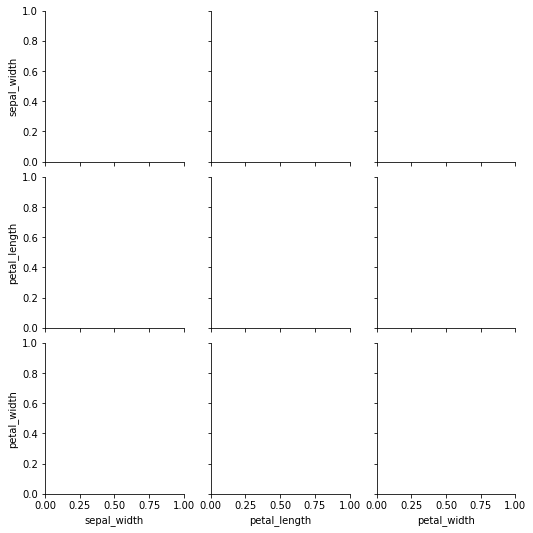

In [ ]:
sns.pairplot(data, hue='species')

In [ ]:
data.corr()

,sepal_width,petal_length,petal_width
sepal_width,1.000000,-0.420516,-0.356544
petal_length,-0.420516,1.000000,0.962757
petal_width,-0.356544,0.962757,1.000000


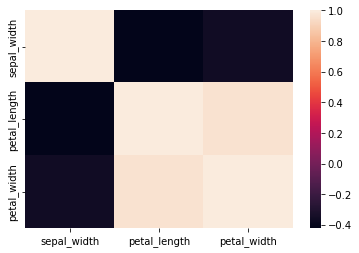

In [ ]:
sns.heatmap(data.corr())

In [ ]:
target=data['species']
df=data.copy()
df=df.drop('species', axis=1)
df.shape

(150, 3)

In [ ]:
#defining the attributes and labels
X=data.iloc[:, [0,1,2,]].values
le=LabelEncoder()
data['species']=le.fit_transform(data['species'])
y=data['species'].values
data.shape
(150, 5)

(150, 5)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("Traingin split:",X_train.shape)
print("Testin spllit:",X_test.shape)


Traingin split: (120, 3)
Testin spllit: (30, 3)


In [ ]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print("Decision Tree Classifier created!")


Decision Tree Classifier created!


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("Traingin split:",X_train.shape)
print("Testin spllit:",X_test.shape)

Traingin split: (120, 3)
Testin spllit: (30, 3)


In [ ]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print("Decision Tree Classifier created!")

Decision Tree Classifier created!


In [ ]:
y_pred=dtree.predict(X_test)
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
print("Accuracy:",sm.accuracy_score(y_test,y_pred))

Accuracy: 1.0


In [ ]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

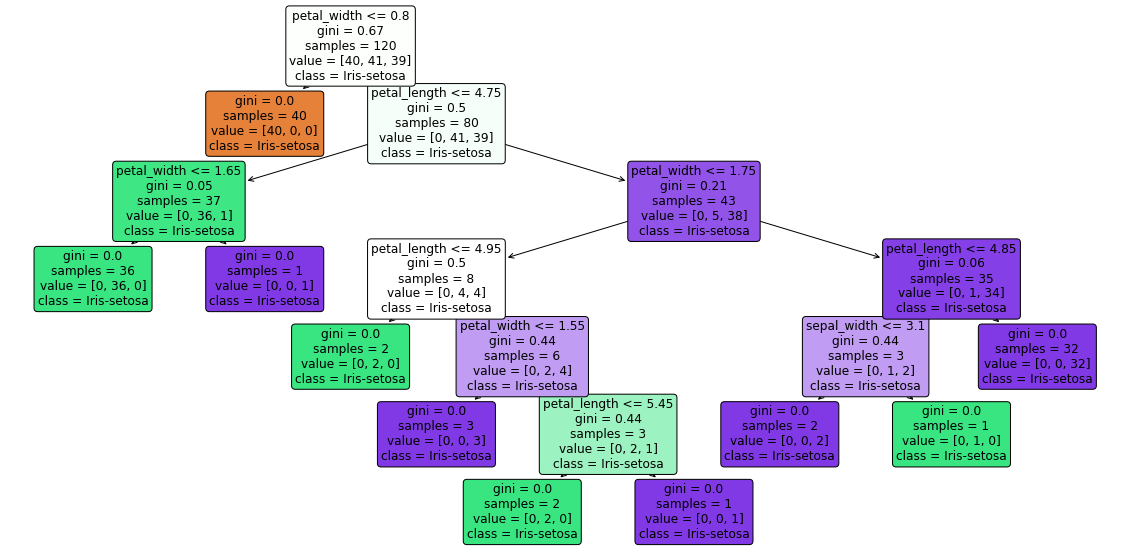

In [ ]:
#visualizing the graph
mt.figure(figsize=(20,10))
tree=plot_tree(dtree,feature_names=df.columns,precision=2,rounded=True,filled=True,class_names=target.values)